In [5]:
N = ord("M") % 3 + 1
print(N)

3


### Варіант 3. Дослідження втрат бронетранспортерів (БТР).1. Створіть функцію, яка приймає назву файлу та назву стовпця як 
параметр та повертає масив numpy зі значеннями стовпця.
2. Використовуючи функцію з попереднього завдання, створіть масив 
numpy зі значень стовпця «APC» (Armored personnel carrier).
3. Знайдіть добові втрати БТР.
4. Знайдіть 5 найбільших добових втрат БТР.
5. Визначте, скільки БТР було знищено влітку 2023 року.
6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.
7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої 
дати в наборі даних)

#### Реалізація завдання №1

In [7]:
import numpy as np
import csv
def getInfoFromCSVfile(file_Name, column_Name):
    with open(file_Name, "r", encoding='utf-8') as csvFile:
        reader = csv.reader(csvFile)
        
        
        headers = next(reader)
        column_index = headers.index(column_Name)
        
        
        column_data = []
        for row in reader:
            column_data.append(row[column_index])
        
    
    column_data_np = np.array(column_data, dtype=None)  
    
    return column_data_np


#### Реалізація завдання №3

In [10]:
def calculate_daily_losses_APC(arrayOfDataAPC, arrayOfDataDate):

    daily_losses_APC = np.diff(arrayOfDataAPC)

    daily_losses_dates = arrayOfDataDate[1:]

    dates_str = daily_losses_dates.astype(str)
    losses_str = daily_losses_APC.astype(str)

    result = np.char.add(np.char.add("Date: ", dates_str), np.char.add(", Daily APC Losses: ", losses_str))

    return result
    
dataAPC = getInfoFromCSVfile("russia_losses_equipment.csv", "APC")
dataDate = getInfoFromCSVfile("russia_losses_equipment.csv", "date")

arrayOfDataAPC = np.array(dataAPC).astype(np.int64)
arrayOfDataDate = np.array(dataDate).astype(np.datetime64)

print(calculate_daily_losses_APC(arrayOfDataAPC, arrayOfDataDate))

['Date: 2024-11-02, Daily APC Losses: -36'
 'Date: 2024-11-01, Daily APC Losses: -17'
 'Date: 2024-10-31, Daily APC Losses: -20'
 'Date: 2024-10-30, Daily APC Losses: -17'
 'Date: 2024-10-29, Daily APC Losses: -29'
 'Date: 2024-10-28, Daily APC Losses: -9'
 'Date: 2024-10-27, Daily APC Losses: -40'
 'Date: 2024-10-26, Daily APC Losses: -23'
 'Date: 2024-10-25, Daily APC Losses: -45'
 'Date: 2024-10-24, Daily APC Losses: -33'
 'Date: 2024-10-23, Daily APC Losses: -25'
 'Date: 2024-10-22, Daily APC Losses: -30'
 'Date: 2024-10-21, Daily APC Losses: -24'
 'Date: 2024-10-20, Daily APC Losses: -64'
 'Date: 2024-10-19, Daily APC Losses: -39'
 'Date: 2024-10-18, Daily APC Losses: -19'
 'Date: 2024-10-17, Daily APC Losses: -51'
 'Date: 2024-10-16, Daily APC Losses: -33'
 'Date: 2024-10-15, Daily APC Losses: -30'
 'Date: 2024-10-14, Daily APC Losses: -44'
 'Date: 2024-10-13, Daily APC Losses: -19'
 'Date: 2024-10-12, Daily APC Losses: -49'
 'Date: 2024-10-11, Daily APC Losses: -27'
 'Date: 2024

#### Реалізація завдання №4

In [12]:
def getFiveBiggestDailyLosses(arrayOfDataAPC):
    sorted_arr = np.sort(arrayOfDataAPC)[::-1]
    
    return sorted_arr[:5]
    
dataAPC = getInfoFromCSVfile("russia_losses_equipment.csv", "APC")
print(getFiveBiggestDailyLosses(dataAPC))

['9996' '999' '9974' '9958' '9953']


#### Реалізація завдання №5

In [13]:
def getLossesFromSummer(arrOfAPC,arrOfDate):  
    start_summer = np.datetime64('2023-06-01')
    end_summer = np.datetime64('2023-08-31')

    summer_mask = (arrOfDate >= start_summer) & (arrOfDate <= end_summer)
    summer_losses = arrOfAPC[summer_mask]

    total_summer_losses = np.sum(summer_losses)
    
    return total_summer_losses
    
dataAPC = getInfoFromCSVfile("russia_losses_equipment.csv", "APC")
dataDate = getInfoFromCSVfile("russia_losses_equipment.csv", "date")

arrayOfDataAPC = np.array(dataAPC).astype(np.int64)
arrayOfDataDate = np.array(dataDate).astype(np.datetime64)
print(getLossesFromSummer(arrayOfDataAPC,arrayOfDataDate))


739568


#### Реалізація завдання №6

In [14]:
def getAverageValue(arrayOfDataAPC):
    return (np.array(arrayOfDataAPC).sum()) / 300

dataAPC = getInfoFromCSVfile("russia_losses_equipment.csv", "APC")

arrayOfDataAPC = np.array(dataAPC).astype(np.int64)
print(getAverageValue(arrayOfDataAPC))


29062.34


#### Реалізація завдання №7

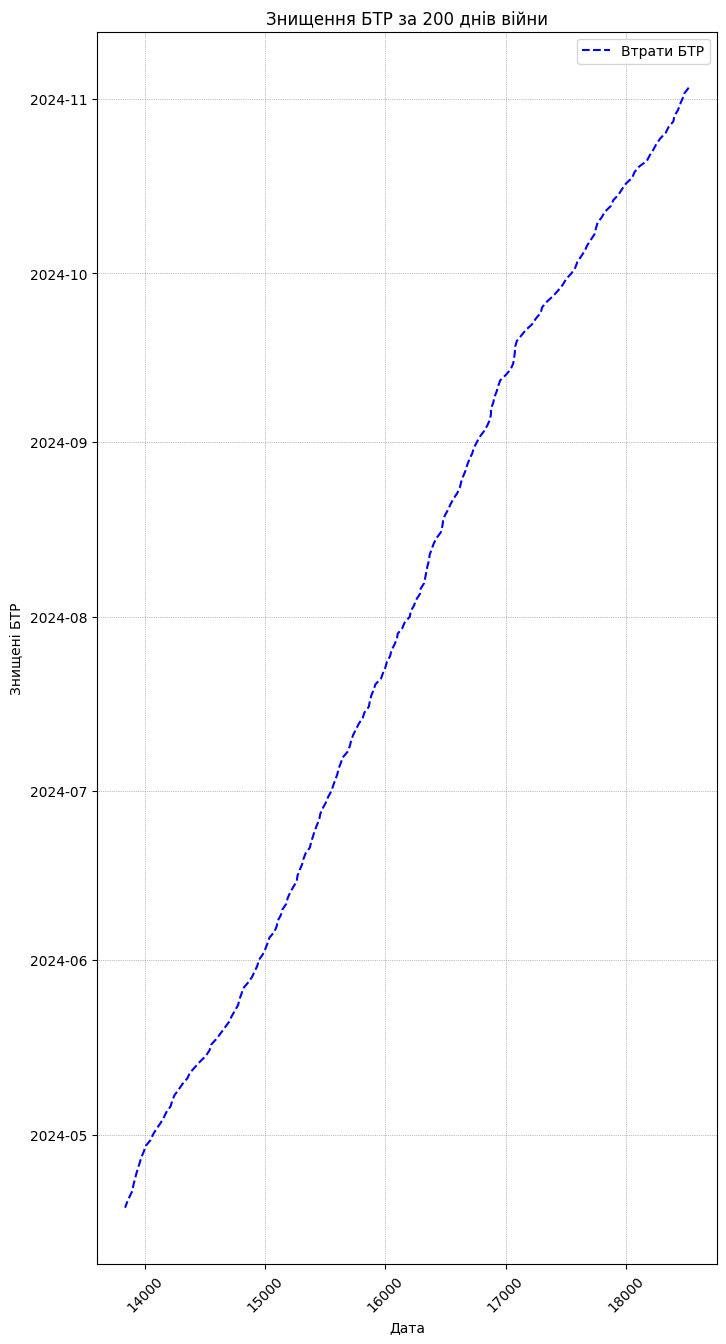

In [16]:
import matplotlib.pyplot as mpl
def createPlot(arrayOfDate, arrayOfAPC):
    x = np.array(arrayOfDate)[:200]  
    y = np.array(arrayOfAPC)[:200]    

    mpl.figure(figsize=(8, 16), dpi=100)

    mpl.plot(x, y, linestyle='--', color='blue', label='Втрати БТР')

    mpl.xlabel('Дата')
    mpl.ylabel('Знищені БТР')

    mpl.title('Знищення БТР за 200 днів війни')

    mpl.grid(color='gray', linestyle=':', linewidth=0.5)

    mpl.legend()

    mpl.xticks(rotation=45)  

    mpl.savefig('APC_losses_plot.png', format='png')

dataAPC = getInfoFromCSVfile("russia_losses_equipment.csv", "APC")
dataDate = getInfoFromCSVfile("russia_losses_equipment.csv", "date")

arrayOfDataAPC = np.array(dataAPC).astype(np.int64)
arrayOfDataDate = np.array(dataDate).astype(np.datetime64)

createPlot(arrayOfDataAPC, arrayOfDataDate)

### Результати виконання

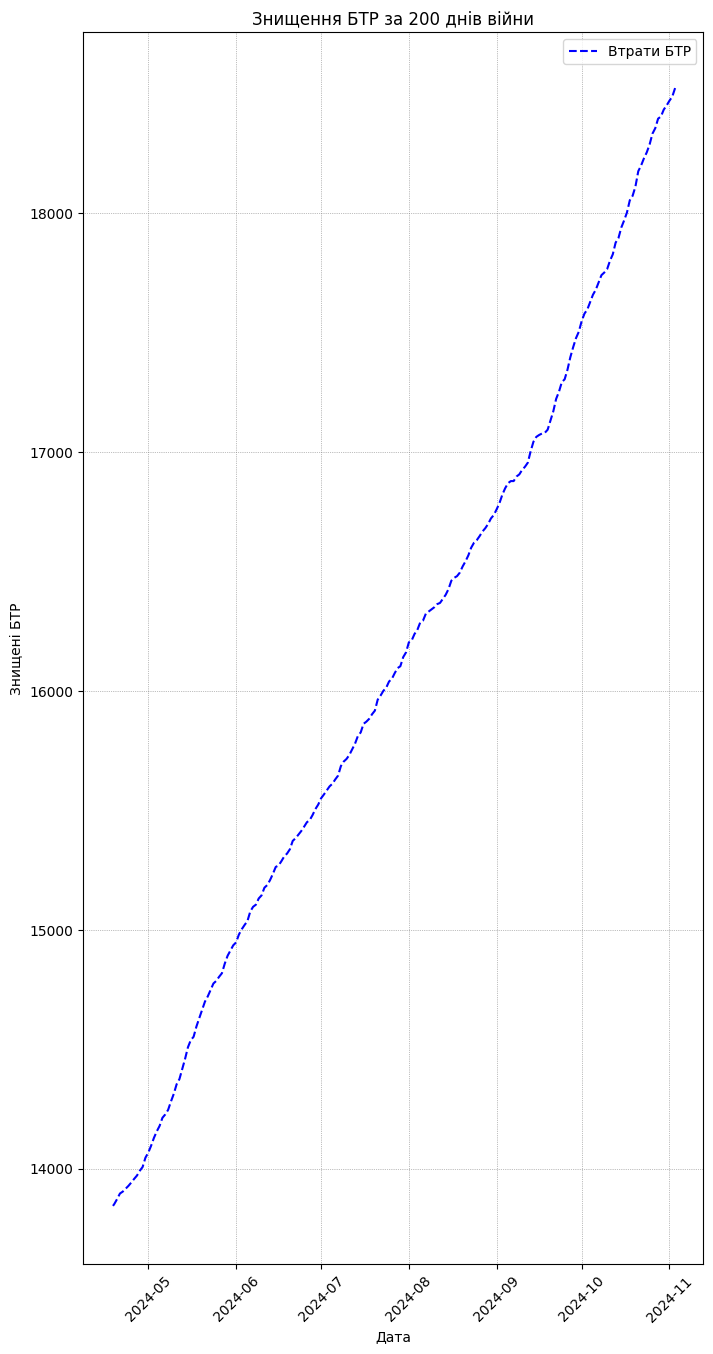

In [38]:
dataAPC = getInfoFromCSVfile("russia_losses_equipment.csv", "APC")
dataDate = getInfoFromCSVfile("russia_losses_equipment.csv", "date")

arrayOfDataAPC = np.array(dataAPC).astype(np.int64)
arrayOfDataDate = np.array(dataDate).astype(np.datetime64)

#print(calculate_daily_losses_APC(arrayOfDataAPC, arrayOfDataDate))

#print(getFiveBiggestDailyLosses(arrayOfDataAPC))

#print(getLossesFromSummer(arrayOfDataAPC,arrayOfDataDate))

#print(getAverageValue(arrayOfDataAPC))

createPlot(arrayOfDataDate,arrayOfDataAPC)